In [469]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
%matplotlib inline

In [470]:
dataset=pd.read_csv("dataSet/advertising.csv")
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [471]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [472]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


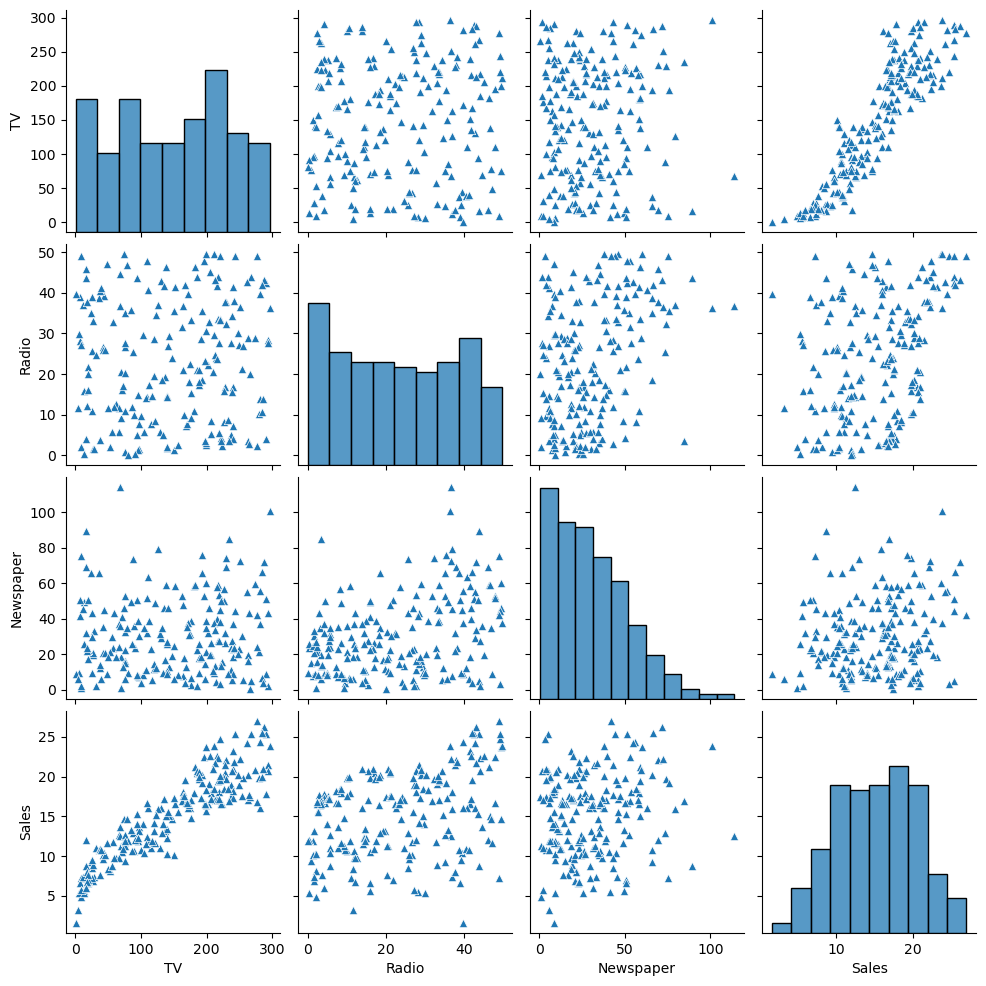

In [473]:
sn.pairplot(dataset, palette="husl", markers='^')

In [474]:
dataset.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

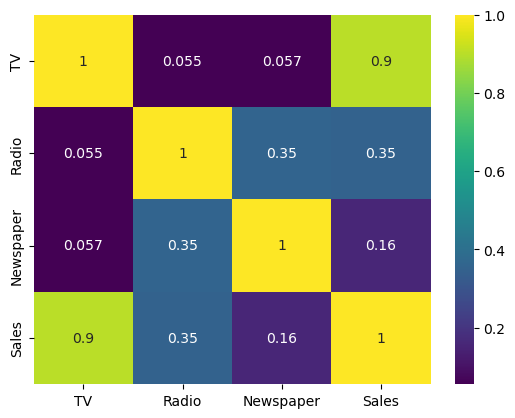

In [475]:
#Sales and 'TV' have strong correlate 
sn.heatmap(dataset.corr(), cmap="viridis",annot=True)

In [476]:
dataset.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# Train Test Split

In [540]:
X=dataset[dataset.columns[:-1]].values
y=dataset.Sales.values.reshape(200,1)

In [541]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


# Creating and Training the Model from sklearn

In [542]:
from sklearn.linear_model import LinearRegression

In [543]:
ln=LinearRegression()

In [544]:
ln.fit(X_train,y_train)

LinearRegression()

In [545]:
print(ln.intercept_,ln.coef_)

[4.51364059] [[ 0.05501361  0.11040316 -0.00361274]]


# Predictions

In [546]:
y_prd=ln.predict(X_test)
y_prd

array([[13.91197081],
       [21.51409033],
       [12.50623979],
       [15.64571065],
       [ 8.95453892],
       [ 7.26679098],
       [22.08788314],
       [18.9221348 ],
       [12.40930072],
       [20.17260259],
       [11.01041341],
       [15.87106913],
       [17.0767102 ],
       [20.69299835],
       [18.80492454],
       [ 9.74672785],
       [19.29267997],
       [ 9.90627274],
       [ 8.47852308],
       [21.10333404],
       [ 7.7495942 ],
       [18.18427632],
       [24.99460987],
       [23.40529365],
       [ 9.33307729],
       [15.72260782],
       [23.71729972],
       [ 8.96158022],
       [14.66434096],
       [10.27701673],
       [ 9.46003569],
       [20.14120227],
       [12.40934475],
       [ 6.81603845],
       [17.7987012 ],
       [ 9.91818549],
       [10.52001425],
       [10.20763448],
       [ 9.06788052],
       [13.38583362],
       [11.87246615],
       [12.3237862 ],
       [11.29938054],
       [ 7.76156279],
       [11.58388031],
       [10

In [547]:
from sklearn import metrics
mae=metrics.mean_absolute_error(y_prd,y_test)
mse=metrics.mean_squared_error(y_prd,y_test)
rmse=np.sqrt(mse)

In [548]:
print(mse)

2.8162144680027823


In [549]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [553]:
coef_determination(y_test,y_prd)

0.8949009939756739

# Creating and Training the Model from scratch 

In [592]:
X=dataset[dataset.columns[:-1]].values
y=dataset.Sales.values

In [593]:
#y=y.reshape(y.shape[1],1)

In [594]:
X=np.hstack((X,np.ones((X.shape[0],1))))

In [595]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


# FUNCTIONS

In [596]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [597]:
def initialisation_of_theta(X):
    np.random.seed(0) 
    theta=np.random.randn(X.shape[1],1)
    theta=np.ones(X.shape[1])
    return theta

In [598]:
def model(X,theta):
    return X.dot(theta)

In [599]:
def cost_fonction(X,y,theta):
    y_hat=model(X,theta)
    return 1/(2*len(y))*np.sum((y-y_hat)**2)

In [600]:
def grad(X,y,theta):
    return 1/len(y)*X.T.dot(model(X,theta)-y)

In [601]:
def gradient_descent(X,y,lr,epochs):
    cost_history=np.zeros(X.shape[0])
    theta=initialisation_of_theta(X)

    for i in range(epochs):
        cost_history[i]=cost_fonction(X,y,theta)
        dtheta=grad(X,y,theta)
        theta=theta-lr*dtheta
    return theta,cost_history

In [602]:
lr=0.01
epochs=10

In [603]:
theta_final,cost=gradient_descent(X_train,y_train,lr,epochs)

In [604]:
theta_final

array([1.11925381e+25, 1.35309017e+24, 1.80063217e+24, 5.65621020e+22])

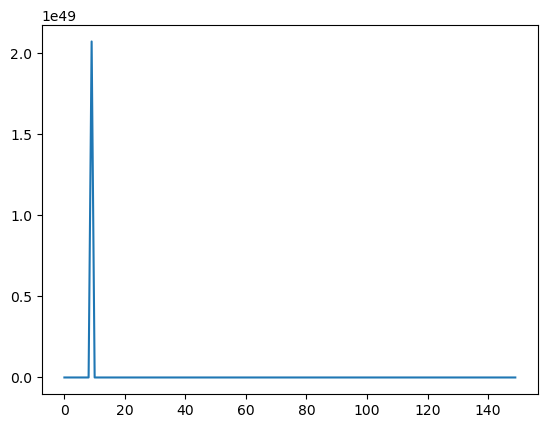

In [605]:
plt.plot(range(len(cost)), cost)
plt.show()

In [606]:
y_prd=model(X_test,theta_final)

In [607]:
cost_fonction(X_train,y_train,theta_final)

2.0620050506114002e+54

In [608]:
coef_determination(y_test,y_prd)

-1.2473046428566596e+53

# IRIS DATA BASE

In [504]:
data=pd.read_csv("dataSet/iris.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [505]:
data['class']=data['class'].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],(1,2,3))

In [506]:
X=data[data.columns[:-1]].values
y=data['class'].values

In [507]:
X=np.hstack((X,np.ones((X.shape[0],1))))

In [508]:
X

array([[5.1, 3.5, 1.4, 0.2, 1. ],
       [4.9, 3. , 1.4, 0.2, 1. ],
       [4.7, 3.2, 1.3, 0.2, 1. ],
       [4.6, 3.1, 1.5, 0.2, 1. ],
       [5. , 3.6, 1.4, 0.2, 1. ],
       [5.4, 3.9, 1.7, 0.4, 1. ],
       [4.6, 3.4, 1.4, 0.3, 1. ],
       [5. , 3.4, 1.5, 0.2, 1. ],
       [4.4, 2.9, 1.4, 0.2, 1. ],
       [4.9, 3.1, 1.5, 0.1, 1. ],
       [5.4, 3.7, 1.5, 0.2, 1. ],
       [4.8, 3.4, 1.6, 0.2, 1. ],
       [4.8, 3. , 1.4, 0.1, 1. ],
       [4.3, 3. , 1.1, 0.1, 1. ],
       [5.8, 4. , 1.2, 0.2, 1. ],
       [5.7, 4.4, 1.5, 0.4, 1. ],
       [5.4, 3.9, 1.3, 0.4, 1. ],
       [5.1, 3.5, 1.4, 0.3, 1. ],
       [5.7, 3.8, 1.7, 0.3, 1. ],
       [5.1, 3.8, 1.5, 0.3, 1. ],
       [5.4, 3.4, 1.7, 0.2, 1. ],
       [5.1, 3.7, 1.5, 0.4, 1. ],
       [4.6, 3.6, 1. , 0.2, 1. ],
       [5.1, 3.3, 1.7, 0.5, 1. ],
       [4.8, 3.4, 1.9, 0.2, 1. ],
       [5. , 3. , 1.6, 0.2, 1. ],
       [5. , 3.4, 1.6, 0.4, 1. ],
       [5.2, 3.5, 1.5, 0.2, 1. ],
       [5.2, 3.4, 1.4, 0.2, 1. ],
       [4.7, 3

In [509]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

In [510]:
lr=0.001
epochs=100

In [511]:
theta_final,cost=gradient_descent(X_train,y_train,lr,epochs)

In [512]:
theta_final

array([-0.23769886,  0.3531673 ,  0.17897698,  0.73154782,  0.79194904])

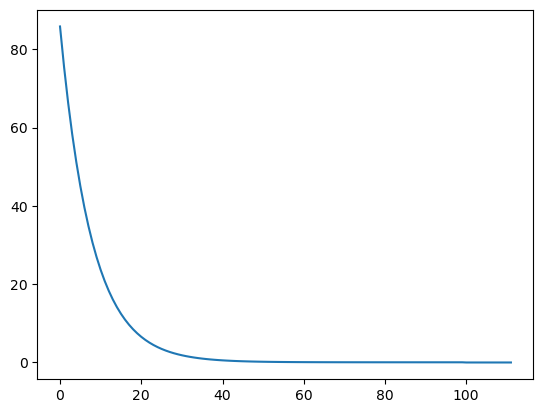

In [513]:
plt.plot(range(len(cost)),cost)
plt.show()

In [514]:
pred=model(X_test,theta_final)

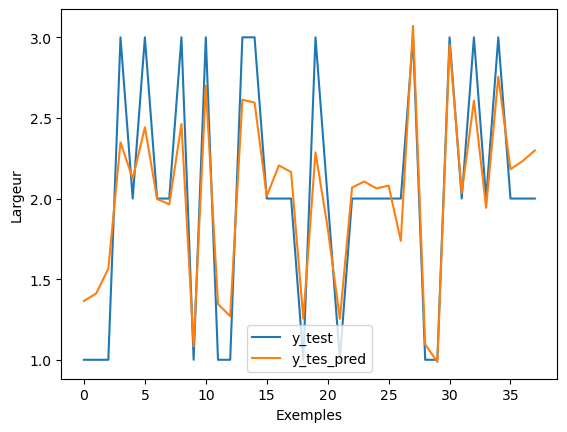

In [515]:
plt.plot(y_test, label='y_test')
plt.plot(pred, label='y_tes_pred')
plt.xlabel('Exemples')
plt.ylabel('Largeur')
plt.legend()
plt.show()

In [516]:
coef_determination(y_test,pred)

0.832519520838387

In [517]:
ln.fit(X_train,y_train)

LinearRegression()

In [518]:
y_prd=ln.predict(X_test)


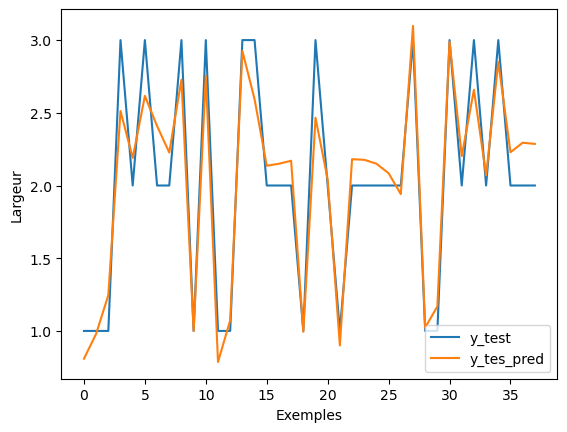

In [520]:
plt.plot(y_test, label='y_test')
plt.plot(y_prd, label='y_tes_pred')
plt.xlabel('Exemples')
plt.ylabel('Largeur')
plt.legend()
plt.show()

In [519]:
coef_determination(y_test,y_prd)

0.9045482035904533